# Maman 11 - Biological Computation
## Answer 2
__(a)__ In the word file

__(b)__

In [1]:
import pandas as pd
import numpy as np
from random import randint, choice, choices
import matplotlib.pyplot as plt
from matplotlib import colors
import time
from IPython.display import clear_output
from  matplotlib.colors import LinearSegmentedColormap

In [2]:
class Cell:
    def __init__(self, state, i = 100, j = 100):
        self.state = state
        self.i, self.j = i,j
        
        if state == "S":
            self.height = np.random.normal(200,100)
        else:
            self.height = np.random.normal(800,100)
        
        if state == "G":
            self.temperature = randint(-15,-5)
        else:
            if self.height > 1200:
                self.temperature = randint(15,20)
            elif self.height < 200:
                self.temperature = randint(25,30)
            else:
                self.temperature = randint(20,25)

        self.wind = {
            "Direction": choice(["N","W","E","S"]),
            "Strength": choices([0, 5, 10, 15, 20, 25, 30],
                                [0.05,0.15,0.2,0.25,0.15,0.15,0.05])
        }
        self.wind["Strength"] = self.wind["Strength"][0] 

        self.cloudPrecipitation = 0 # From 0 (dry) to 100 (rain)

        self.airPollution = 0 # Based on AQI: Scale from 0 to 500
        #self.airPollution = randint(50,100) #For (d.2)
                
        if state == "None": #for OutOfBounds neighbors
            self.height = 4000
            self.temperature = 1000
            self.wind = {"Direction": None, "Strength": 0}
            
    def TransitRules(self, AutomataCopy):
        up = AutomataCopy[self.i - 1][self.j] if self.i > 0 else Cell("None") 
        down = AutomataCopy[self.i + 1][self.j] if self.i < 34 else Cell("None")
        left = AutomataCopy[self.i][self.j - 1] if self.j > 0 else Cell("None")
        right = AutomataCopy[self.i][self.j + 1] if self.j < 34 else Cell("None")
        
        if AutomataCopy[self.i][self.j].state == "C" and AutomataCopy[self.i][self.j].airPollution <= 475: #City increase AirPollution
            self.airPollution += 25
            self.temperature += (25/500)

        if AutomataCopy[self.i][self.j].cloudPrecipitation >= 100: #Rain
            self.cloudPrecipitation = 0
            self.temperature -= ((self.airPollution*0.35)/500)
            self.airPollution = self.airPollution * 0.65
            self.temperature -= 1 if self.temperature > 5 else 0
            
            if AutomataCopy[self.i][self.j].state == "S": #The water level is rising
                self.height += 10
            elif AutomataCopy[self.i][self.j].state == "L" and choice([0,0,1]) == 1:
                self.state == "F"
        
        if AutomataCopy[self.i][self.j].state == "G" and AutomataCopy[self.i][self.j].temperature > 0: #A glacier melts above 0 degrees
            self.state = "L"
            
        if AutomataCopy[self.i][self.j].state == "F" and (AutomataCopy[self.i][self.j].temperature > 40 or AutomataCopy[self.i][self.j].airPollution > 300): #Forests do not survive above 40 degrees
            self.state = "L"
            
        #if AutomataCopy[self.i][self.j].state == "C" and AutomataCopy[self.i][self.j].airPollution >= 500: #City do not survive above 500 AQI
        #    self.state = "L" 
            
        if AutomataCopy[self.i][self.j].state == "F": #A forest reduces air pollution and temp
            self.temperature -= (20/500)*0.2 if self.temperature > 15 else self.temperature
            self.airPollution -= 20
            if self.airPollution < 0:
                self.airPollution = 0
                
        if AutomataCopy[self.i][self.j].state == "S" and AutomataCopy[self.i][self.j].temperature > 100: #Sea above a hundred degrees evaporates
            self.state = "L"
        
        for Neighbor in [up,down,left,right]: #Land lying next to the sea and lower than it is flooded
            if Neighbor.state == "S" and Neighbor.height > AutomataCopy[self.i][self.j].height:
                self.state = "S"
        
        #The wind blows the clouds and the air pollution
        self.temperature -= ((self.airPollution - self.airPollution * (self.wind["Strength"]*3.5/100)) /500)
        self.airPollution -= self.airPollution * (self.wind["Strength"]*3.5/100) 
        self.cloudPrecipitation -= self.cloudPrecipitation * ((self.wind["Strength"]*1.2)/100)
        
        if down.wind["Direction"] == "N":
            self.temperature += ((self.airPollution + down.airPollution * (down.wind["Strength"]*3.5/100))/500)
            self.airPollution += down.airPollution * (down.wind["Strength"]*3.5/100) 
            self.cloudPrecipitation += down.cloudPrecipitation * ((down.wind["Strength"]*1.2)/100)
            
        if up.wind["Direction"] == "S":
            self.temperature += ((self.airPollution + up.airPollution * (up.wind["Strength"]*3.5/100))/500)
            self.airPollution += up.airPollution * (up.wind["Strength"]*3.5/100)
            self.cloudPrecipitation += up.cloudPrecipitation * ((up.wind["Strength"]*1.2)/100)
            
        if left.wind["Direction"] == "E":
            self.temperature += ((self.airPollution + left.airPollution * (left.wind["Strength"]*3.5/100))/500)
            self.airPollution += left.airPollution * (left.wind["Strength"]*3.5/100)
            self.cloudPrecipitation += left.cloudPrecipitation * ((left.wind["Strength"]*1.2)/100)
            
        if right.wind["Direction"] == "W":
            self.temperature += ((self.airPollution + right.airPollution * (right.wind["Strength"]*3.5/100))/500)
            self.airPollution += right.airPollution * (right.wind["Strength"]*3.5/100)
            self.cloudPrecipitation += right.cloudPrecipitation * ((right.wind["Strength"]*1.2)/100)
            
        self.cloudPrecipitation += 8*choice([0,0,0,1])
        
        if choice([0,0,0,0,1]) == 1:
            self.wind = {
            "Direction": choice(["N","W","E","S"]),
            "Strength": choices([0, 5, 10, 15, 20, 25, 30],
                                [0.05,0.15,0.2,0.25,0.15,0.15,0.05])
        }
            self.wind["Strength"] = self.wind["Strength"][0] 
            
        if self.airPollution >= 500:
            self.airPollution = 500
            
        if self.temperature >= 45:
            self.temperature = 45
    

In [3]:
def initializationAutomata():
    AutomataStates = pd.read_csv("Earth.csv", header = None)
    Automata = [[0]*35 for i in range(35)]
    
    for i in range(35):
        for j in range(35):
            Automata[i][j] = Cell(AutomataStates.iloc[i,j], i, j)
    return Automata

Automata = initializationAutomata()

In [4]:
State2Num = {
    "L": 0,
    "G": 1,
    "S": 2,
    "F": 3,
    "C": 4
}

def plotAutomata(Automata, title = ""):
    statesMap = np.zeros([35, 35])
    temperatureMap = np.zeros([35, 35])
    windMap = np.zeros([35, 35])
    cloudMap = np.zeros([35, 35])
    pollutionMap = np.zeros([35, 35])
    
    for i in range(35):
        for j in range(35):
            statesMap[i][j] = State2Num[Automata[i][j].state]
            temperatureMap[i][j] = Automata[i][j].temperature
            windMap[i][j] = Automata[i][j].wind["Strength"]
            cloudMap[i][j] = Automata[i][j].cloudPrecipitation
            pollutionMap[i][j] = Automata[i][j].airPollution
    
    fig = plt.figure(figsize=(36, 15))      
    grid = plt.GridSpec(2, 4, wspace=0, hspace=0.2)
    
    cmap = colors.ListedColormap(['#BF9627', 'white', '#47F4FF', '#75E453', '#929E8E'])
    bounds = [0,1,2,3,4,5]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax = fig.add_subplot(grid[:,0:2])
    ax.imshow(statesMap, cmap=cmap, norm=norm)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("States Map"+ title,fontsize = 20)
    
    ####
    
    ax = fig.add_subplot(grid[0,2])
    ax.imshow(temperatureMap,cmap='jet')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("Temperature Map",fontsize = 20)

    
    
     ####
    cmap = colors.ListedColormap(['#abd9e9', '#e0f3f8', '#ffffbf', '#fee090', '#fdae61', '#f46d43', '#d73027'])
    bounds = [0, 5, 10, 15, 20, 25, 30]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    ax = fig.add_subplot(grid[0,3])
    ax.imshow(windMap, cmap=cmap, norm=norm)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("Wind Map",fontsize = 20)

    
    
     ####
    ax = fig.add_subplot(grid[1,2])
    ax.imshow(cloudMap, cmap='Spectral')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("Cloud Precipitation Map",fontsize = 20)

    
    
     ####
   
    ax = fig.add_subplot(grid[1,3])
   
    ax.imshow(pollutionMap, cmap='turbo')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("Pollution Map",fontsize = 20)

    plt.show()
    
    return np.mean(temperatureMap), np.mean(pollutionMap), np.mean(windMap), np.mean(cloudMap)

In [5]:
def step():
    AutomataCopy = [row[:] for row in Automata]
    for i in range(35):
        for j in range(35):
            cell = Automata[i][j]
            cell.TransitRules(AutomataCopy)

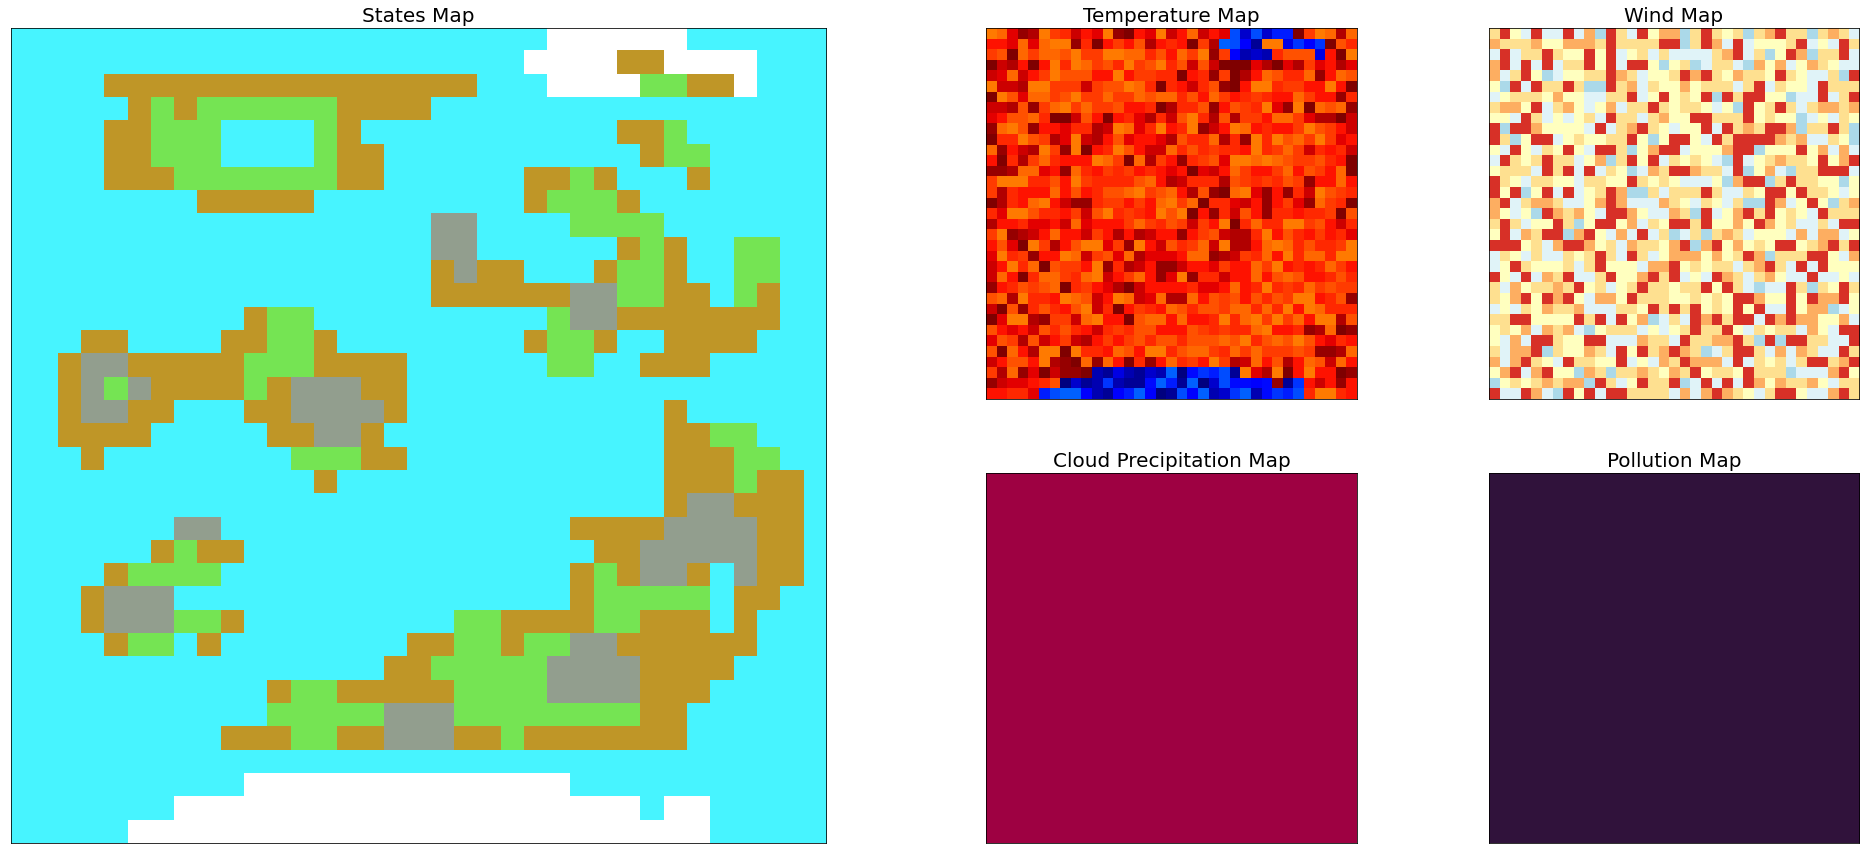

(21.92408163265306, 0.0, 14.371428571428572, 0.0)

In [6]:
plotAutomata(Automata)

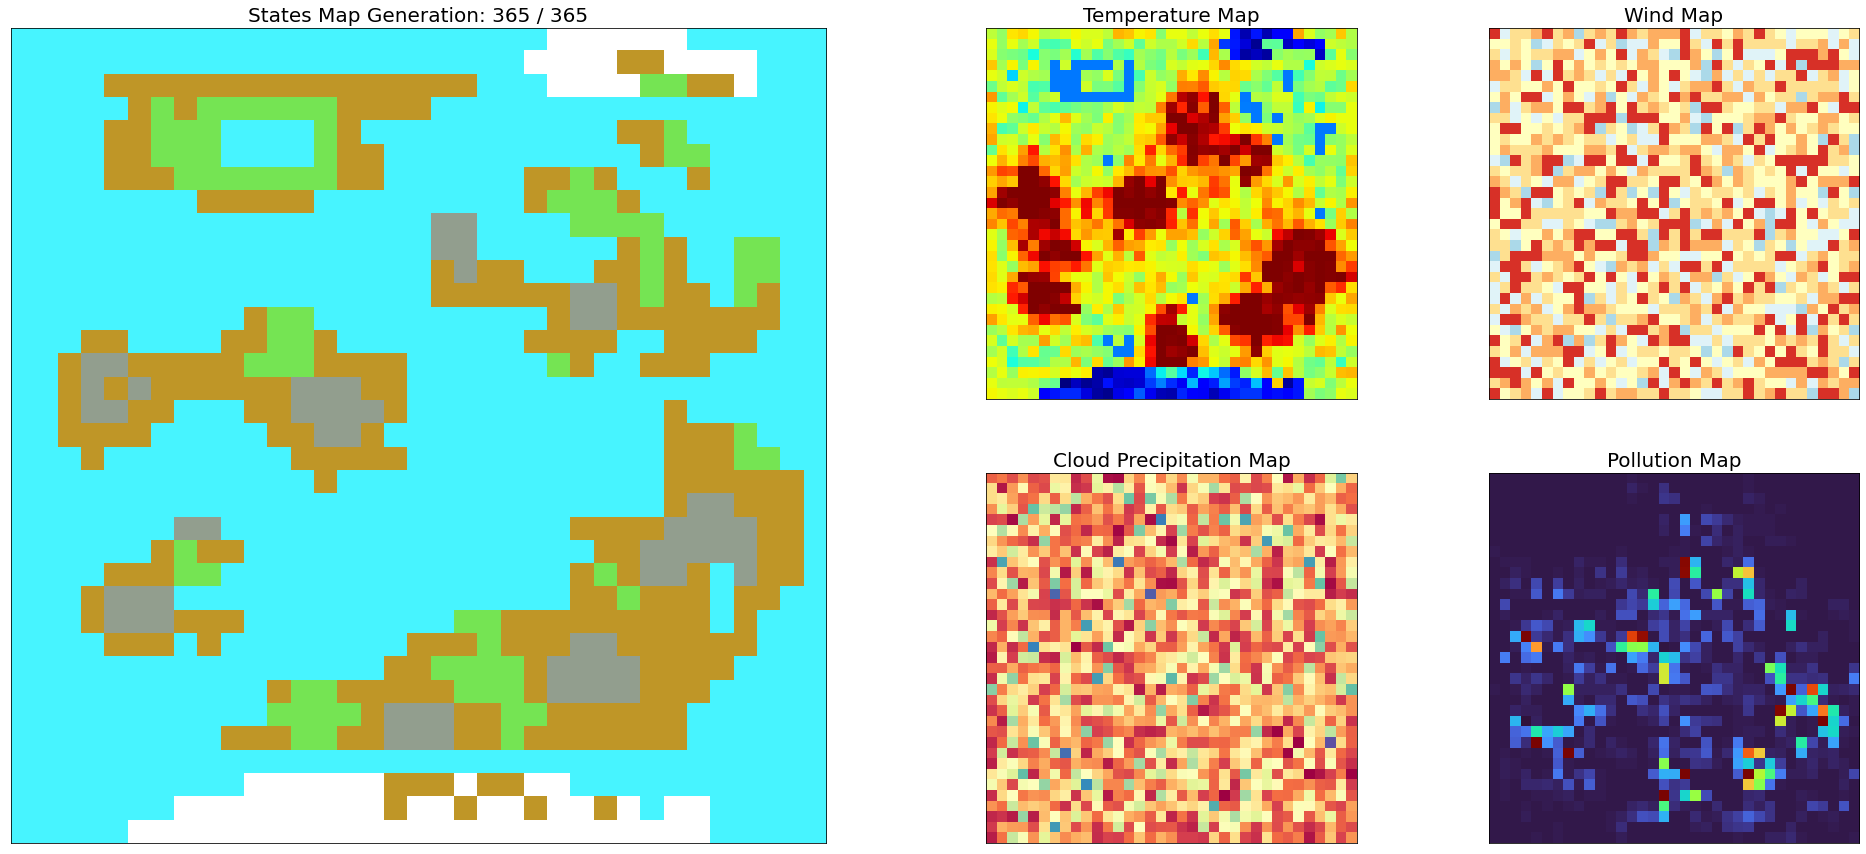

In [7]:
NumOfGenerations = 365
temp_per_day = np.zeros(NumOfGenerations)
pollution_per_day = np.zeros(NumOfGenerations)
wind_per_day = np.zeros(NumOfGenerations)
cloud_per_day = np.zeros(NumOfGenerations)


for i in range(NumOfGenerations):
    temp_per_day[i], pollution_per_day[i],wind_per_day[i],cloud_per_day[i] = plotAutomata(Automata, " Generation: {} / {}".format(i+1,NumOfGenerations))
    step()
    #time.sleep(0.2)
    clear_output(wait = True)

__(c)__

In [8]:
print("Temperature: max: {:.1f}, min: {:.1f}, mean: {:.1f}, std: {:.1f}".format(np.max(temp_per_day),
                                                                                np.min(temp_per_day),
                                                                                np.mean(temp_per_day),
                                                                                np.std(temp_per_day)
                                                               ))
print("Pollution:   max: {:.1f}, min: {:.1f} , mean: {:.1f}, std: {:.1f}".format(np.max(pollution_per_day),
                                                                       np.min(pollution_per_day),
                                                                       np.mean(pollution_per_day),
                                                                       np.std(pollution_per_day)
                                                               ))

Temperature: max: 24.2, min: 21.9, mean: 23.4, std: 0.7
Pollution:   max: 24.3, min: 0.0 , mean: 19.8, std: 4.1


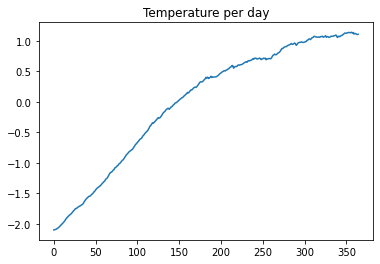

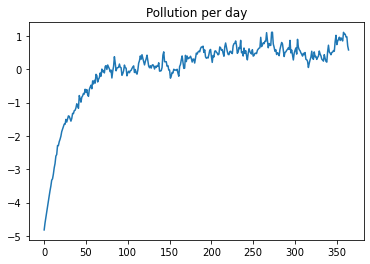

In [9]:
plt.title("Temperature per day")
plt.plot(np.arange(NumOfGenerations),(temp_per_day - np.mean(temp_per_day))/np.std(temp_per_day)) 
plt.show()

plt.title("Pollution per day")
plt.plot(np.arange(NumOfGenerations),(pollution_per_day - np.mean(pollution_per_day))/np.std(pollution_per_day)) 
plt.show()

__(d)__

In [10]:
print("Correlation between pollution & temperature: {:.2f}.".format(np.corrcoef(pollution_per_day,temp_per_day)[0][-1]))
print("Correlation between pollution & wind: {:.2f}.".format(np.corrcoef(pollution_per_day,wind_per_day)[0][-1]))
print("Correlation between pollution & precipitation: {:.2f}.".format(np.corrcoef(pollution_per_day,cloud_per_day)[0][-1]))

Correlation between pollution & temperature: 0.81.
Correlation between pollution & wind: 0.06.
Correlation between pollution & precipitation: 0.82.
